<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/Recommneder_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [3]:
data=pd.read_csv("/content/ratings_small.csv")

In [4]:
data.shape

(100004, 4)

In [5]:
data

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
freq=data['movieId'].value_counts()

In [ ]:
freq

356       341
296       324
318       311
593       304
260       291
         ... 
98604       1
103659      1
104419      1
115927      1
6425        1
Name: movieId, Length: 9066, dtype: int64

In [ ]:
freq=freq[freq>20].index

In [ ]:
freq

Int64Index([  356,   296,   318,   593,   260,   480,  2571,     1,   527,
              589,
            ...
            86882,   147,   100,  3060,  6754,  3258,  4054,  2976, 45186,
            81847],
           dtype='int64', length=1247)

In [ ]:
most_populat_df=data[data['movieId'].isin(freq)]

In [ ]:
most_populat_df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99996,671,5991,4.5,1064245387
99997,671,5995,4.0,1066793014
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
most_populat_df[['movieId','rating']].groupby('movieId').mean()

,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
5,3.267857
6,3.884615
...,...
116797,4.109375
122882,3.790323
122886,3.517241


In [ ]:
from itertools import permutations

In [ ]:
def pairs(x):
  pairs=pd.DataFrame(list(permutations(x.values,2)),columns=['a_movie','b_movie'])
  return pairs

In [ ]:
data

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
compinations=data.iloc[:1000,:].groupby('userId')['movieId'].apply(pairs)

In [ ]:
compinations

a_movie  b_movie
userId                       
1      0          31     1029
       1          31     1061
       2          31     1129
       3          31     1172
       4          31     1263
...              ...      ...
15     1401      153      123
       1402      153      125
       1403      153      145
       1404      153      149
       1405      153      150

[96488 rows x 2 columns]

In [ ]:
compinations.reset_index(drop=True ,inplace=True)

In [ ]:
compinations

,a_movie,b_movie
0,31,1029
1,31,1061
2,31,1129
3,31,1172
4,31,1263
...,...,...
96483,153,123
96484,153,125
96485,153,145
96486,153,149


In [ ]:
compinations=compinations.groupby(['a_movie','b_movie']).size()

In [ ]:
compinations

a_movie  b_movie
1        2          1
         5          1
         6          1
         10         2
         11         1
                   ..
106487   91548      1
         96079      1
         96861      1
         97938      1
         104841     1
Length: 90776, dtype: int64

In [ ]:
compinations=compinations.to_frame(name='size').reset_index()

In [ ]:
compinations.sort_values('size', ascending=False, inplace=True)

In [ ]:
compinations

,a_movie,b_movie,size
10935,356,110,5
3648,110,356,5
11029,356,588,5
30113,1197,1210,5
18536,588,356,5
...,...,...,...
31699,1210,1777,1
31698,1210,1754,1
31697,1210,1721,1
31696,1210,1719,1


In [ ]:
compinations[compinations['a_movie']==356]

,a_movie,b_movie,size
10935,356,110,5
11029,356,588,5
10970,356,296,5
11030,356,589,4
11031,356,590,4
...,...,...,...
10953,356,225,1
10952,356,223,1
10951,356,222,1
10950,356,208,1


In [ ]:
import pandas as pd
from scipy.spatial.distance import pdist,squareform

In [ ]:
data=pd.read_csv('/content/Movie_combined.csv')
data

,Unnamed: 0,Title,Genre,Plot,Poster
0,0,the great train robbery,action,The film opens with two bandits breaking into ...,https://m.media-amazon.com/images/M/MV5BOWE4M2...
1,1,the suburbanite,comedy,The film is about a family who move to the sub...,https://m.media-amazon.com/images/M/MV5BMTUwOT...
2,2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...,0
3,5,the adventures of dollie,drama,On a beautiful summer day a father and mother ...,https://m.media-amazon.com/images/M/MV5BMDlmYz...
4,6,the black viper,drama,A thug accosts a girl as she leaves her workpl...,https://m.media-amazon.com/images/M/MV5BZDVjYT...
...,...,...,...,...,...
17298,21223,selam,drama,The film opens with a Senegalese boy named Kha...,https://m.media-amazon.com/images/M/MV5BMzEyMz...
17299,21224,particle (film),drama,"Zeynep lost her job at weaving factory, and he...",NaN
17300,21225,çalgı çengi i̇kimiz,comedy,"Two musicians, Salih and Gürkan, described the...",https://m.media-amazon.com/images/M/MV5BNWM0N2...
17301,21226,olanlar oldu,comedy,"Zafer, a sailor living with his mother Döndü i...",https://m.media-amazon.com/images/M/MV5BYWViZj...


In [ ]:
df_encodded_each_movie=pd.crosstab(data['Title'],data['Genre'])

In [ ]:
df_encodded_each_movie

Genre,action,animation,comedy,drama,romance,thriller
Title,,,,,,
10 terrorists,0,0,1,0,0,0
"10,000 bc",1,0,0,0,0,0
12/12/12,0,0,0,0,0,1
13 going on 30,0,0,1,0,0,0
2:22,0,0,0,0,0,1
...,...,...,...,...,...,...
æon flux,1,0,0,0,0,0
çalgı çengi i̇kimiz,0,0,1,0,0,0
çok berbat hareketler bunlar,0,0,1,0,0,0


In [ ]:
similarity=1-squareform(pdist(df_encodded_each_movie.values,metric='jaccard'))

In [ ]:
similarity

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [ ]:
kacarded_items=pd.DataFrame(similarity,index=df_encodded_each_movie.index,columns=df_encodded_each_movie.index)

In [ ]:
kacarded_items["'68"].value_counts(ascending=True)

0.5        7
1.0     5436
0.0    11177
Name: '68, dtype: int64

Contend based recommender based on texted attributes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data

,Unnamed: 0,Title,Genre,Plot,Poster
0,0,the great train robbery,action,The film opens with two bandits breaking into ...,https://m.media-amazon.com/images/M/MV5BOWE4M2...
1,1,the suburbanite,comedy,The film is about a family who move to the sub...,https://m.media-amazon.com/images/M/MV5BMTUwOT...
2,2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...,0
3,5,the adventures of dollie,drama,On a beautiful summer day a father and mother ...,https://m.media-amazon.com/images/M/MV5BMDlmYz...
4,6,the black viper,drama,A thug accosts a girl as she leaves her workpl...,https://m.media-amazon.com/images/M/MV5BZDVjYT...
...,...,...,...,...,...
17298,21223,selam,drama,The film opens with a Senegalese boy named Kha...,https://m.media-amazon.com/images/M/MV5BMzEyMz...
17299,21224,particle (film),drama,"Zeynep lost her job at weaving factory, and he...",NaN
17300,21225,çalgı çengi i̇kimiz,comedy,"Two musicians, Salih and Gürkan, described the...",https://m.media-amazon.com/images/M/MV5BNWM0N2...
17301,21226,olanlar oldu,comedy,"Zafer, a sailor living with his mother Döndü i...",https://m.media-amazon.com/images/M/MV5BYWViZj...


appling the tfidf on the plot of the data
that getting the features or the words that occurse by

- tf1=#of words occurre ones /total number of words in documnet

- tf2=log(#of docs words is in /total number of docs)

TFIDF=tf1/tf2

In [ ]:
vectorizer=TfidfVectorizer(min_df=4,max_df=.7)

In [ ]:
data=data.iloc[:1000,:]

In [ ]:
VECTo_object=vectorizer.fit_transform(data['Plot'])

In [ ]:
vectorizer.get_feature_names_out()

array(['000', '10', '100', ..., 'youngest', 'your', 'youth'], dtype=object)

In [ ]:
VECTo_object.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tf_idf_df=pd.DataFrame(VECTo_object.toarray(),columns=vectorizer.get_feature_names_out(),index=data['Title'])

we prepared a crosstable between the items and its features that may releated like words or something

In [ ]:
tf_idf_df

,000,10,100,1000,11,12,13,14,15,18,...,yet,york,yorke,yorker,you,young,younger,youngest,your,youth
Title,,,,,,,,,,,,,,,,,,,,,
the great train robbery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
the suburbanite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
how brown saw the baseball game,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
the adventures of dollie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
the black viper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
the captain hates the sea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
the cat's-paw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.032007,0.0,0.0,0.0,0.0
cheating cheaters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity_table=cosine_similarity(tf_idf_df)

In [ ]:
tf_idf_with_similarity=pd.DataFrame(cosine_similarity_table,index=tf_idf_df.index,columns=tf_idf_df.index)

In [ ]:
tf_idf_with_similarity

Title,the great train robbery,the suburbanite,how brown saw the baseball game,the adventures of dollie,the black viper,a calamitous elopement,the fight for freedom,at the altar,a drunkard's reformation,the golden louis,...,the working man,zoo in budapest,affairs of a gentleman,as the earth turns,beggars in ermine,the captain hates the sea,the cat's-paw,cheating cheaters,cockeyed cavaliers,college rhythm
Title,,,,,,,,,,,,,,,,,,,,,
the great train robbery,1.000000,0.007990,0.038853,0.039371,0.059721,0.047012,0.050201,0.031899,0.059798,0.014643,...,0.099563,0.039458,0.071290,0.000000,0.010949,0.026836,0.036756,0.027764,0.026595,0.023805
the suburbanite,0.007990,1.000000,0.015483,0.012364,0.018896,0.005384,0.030157,0.000000,0.049537,0.003972,...,0.056717,0.006951,0.038931,0.000000,0.000000,0.078814,0.012651,0.077209,0.012002,0.015846
how brown saw the baseball game,0.038853,0.015483,1.000000,0.024106,0.059240,0.019010,0.118099,0.026420,0.055165,0.015163,...,0.055573,0.019715,0.070512,0.000000,0.010998,0.028092,0.040278,0.002812,0.035771,0.065950
the adventures of dollie,0.039371,0.012364,0.024106,1.000000,0.046417,0.052787,0.030059,0.032124,0.023418,0.025851,...,0.072762,0.040353,0.055559,0.000000,0.008875,0.018858,0.054565,0.040622,0.032502,0.027067
the black viper,0.059721,0.018896,0.059240,0.046417,1.000000,0.037245,0.074283,0.082284,0.073586,0.103258,...,0.071593,0.045143,0.054254,0.000000,0.000000,0.034555,0.111547,0.117168,0.012557,0.025420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
the captain hates the sea,0.026836,0.078814,0.028092,0.018858,0.034555,0.006957,0.017821,0.010204,0.010438,0.032739,...,0.059681,0.009796,0.038306,0.000000,0.000000,1.000000,0.029738,0.014862,0.010909,0.005497
the cat's-paw,0.036756,0.012651,0.040278,0.054565,0.111547,0.071924,0.083033,0.032154,0.058930,0.028086,...,0.098673,0.049831,0.059991,0.008467,0.012603,0.029738,1.000000,0.031931,0.047604,0.025058
cheating cheaters,0.027764,0.077209,0.002812,0.040622,0.117168,0.072120,0.004911,0.000000,0.025657,0.000000,...,0.049636,0.024245,0.038049,0.000000,0.000000,0.014862,0.031931,1.000000,0.010065,0.005982


In [ ]:
say_userA_like=['cheating cheaters','college rhythm']

In [ ]:
user_porfile=tf_idf_with_similarity[tf_idf_with_similarity.index.isin(say_userA_like)]

In [ ]:
user_porfile=user_porfile.mean()

In [ ]:
tf_idf_df=tf_idf_df.drop(say_userA_like,axis=0)

In [ ]:
cosine_similarity_for_user=cosine_similarity(user_porfile.values.reshape(1,-1),tf_idf_with_similarity)

In [ ]:
similraty_score_for_useara_for_each_item=pd.DataFrame(cosine_similarity_for_user.T,index=tf_idf_with_similarity.index,columns=['similraty_score'])

In [ ]:
similraty_score_for_useara_for_each_item

,similraty_score
Title,
the great train robbery,0.568981
the suburbanite,0.465643
how brown saw the baseball game,0.587076
the adventures of dollie,0.541566
the black viper,0.628981
...,...
the captain hates the sea,0.428536
the cat's-paw,0.619794
cheating cheaters,0.789938


so we can recommend for user A the top 3 movies

In [ ]:
similraty_score_for_useara_for_each_item.sort_values(ascending=False,by='similraty_score')

,similraty_score
Title,
college rhythm,0.849068
cheating cheaters,0.789938
the pay-off,0.717872
west point,0.717091
the maltese falcon,0.699156
...,...
the river,0.149019
don't marry,0.137265
hell's highway,0.136396


Collabritive filters

In [174]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [175]:
data=pd.read_csv('/content/ratings_small.csv')
data

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [176]:
user_rating_tables=data.pivot(index='userId',columns='movieId',values='rating')

we can fill the values of user_rating_tables bys zeros but its not the best solution cause it will lose some of its implifications

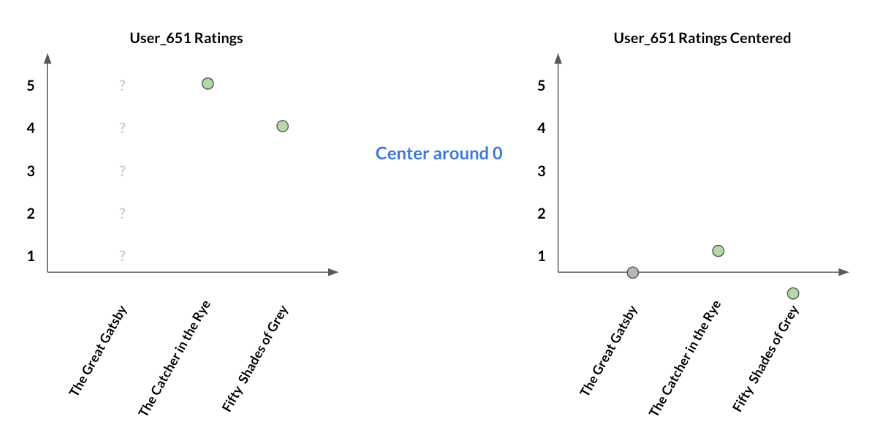

this the soloution is most suitable to fill the NANs values with its nutral values

In [177]:
user_ratings_table_filled = user_rating_tables.fillna(0)

In [178]:
user_rating_tables_means=user_rating_tables.mean(axis=1)

In [179]:
user_rating_tables=user_rating_tables.sub(user_rating_tables_means,axis=0)

In [180]:
user_rating_pivote=user_rating_tables.fillna(0)

In [181]:
user_rating_pivote

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.513158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,-0.348039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.09,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.000000,0.0,0.00,0.0,0.0,0.352941,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Colabritive recommender item based

In [182]:
user_rating_tables

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.348039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,0.352941,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
similarties=cosine_similarity(user_rating_pivote)

In [184]:
cosine_similarity_df=pd.DataFrame(similarties,index=user_rating_tables.index,columns=user_rating_tables.index)

In [185]:
cosine_similarity_df

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.000000,0.003620,-0.002274,0.000000,-0.070321,0.000000,0.042632,0.000000,...,0.000000,0.000000,0.018643,0.001031,0.000000,0.000000,0.000000,0.044095,0.000000,-0.013096
2,0.000000,1.000000,-0.001852,-0.004854,0.012639,0.000000,0.042691,0.021066,0.011109,-0.007989,...,-0.018248,-0.021546,0.018902,-0.058952,0.028515,-0.106828,-0.007999,-0.041628,-0.090233,0.056258
3,0.000000,-0.001852,1.000000,0.018594,-0.025903,-0.063200,0.054900,0.026488,-0.036187,0.038021,...,0.044297,0.019581,0.070702,0.030669,0.143705,0.096713,0.027451,0.089297,-0.009815,0.062276
4,0.003620,-0.004854,0.018594,1.000000,0.010801,0.019224,0.057519,0.055430,-0.010442,0.005126,...,0.011978,0.006569,0.027687,0.092092,0.021334,0.040833,0.018428,0.028642,0.019848,0.032749
5,-0.002274,0.012639,-0.025903,0.010801,1.000000,-0.005843,-0.015075,-0.038886,0.013708,0.030500,...,0.046134,0.001903,0.001620,0.036819,-0.038269,-0.019537,-0.071721,0.003760,-0.029455,-0.036814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.000000,-0.106828,0.096713,0.040833,-0.019537,0.000000,0.048268,0.023800,0.042599,0.036776,...,0.000489,0.000871,0.037650,0.019787,0.094050,1.000000,0.087069,-0.003261,-0.005467,0.035538
668,0.000000,-0.007999,0.027451,0.018428,-0.071721,-0.006876,-0.015626,0.011822,0.054536,0.026691,...,-0.002541,0.026407,0.043421,0.026688,0.071970,0.087069,1.000000,0.000000,0.086991,0.028488
669,0.044095,-0.041628,0.089297,0.028642,0.003760,-0.005780,0.037506,-0.009158,0.004907,-0.009258,...,0.003813,0.006498,0.045351,0.079319,-0.010331,-0.003261,0.000000,1.000000,0.020958,0.045097


using KNN

In [186]:
orderd_similarity_for_user1=cosine_similarity_df.loc[1].sort_values(ascending=False)

In [187]:
nearsk=orderd_similarity_for_user1[1:11].index

In [188]:
user_rating_pivote.reindex(nearsk).mean()

movieId
1         0.083530
2        -0.062602
3         0.175163
4         0.000000
5         0.000000
            ...   
161944    0.000000
162376    0.000000
162542    0.000000
162672    0.000000
163949    0.000000
Length: 9066, dtype: float64

In [189]:
user_rating_pivote

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.513158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,-0.348039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.09,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.000000,0.0,0.00,0.0,0.0,0.352941,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
user_rating_pivote.drop(1,axis=1,inplace=True)

In [191]:
target_user_x=user_rating_pivote.loc[[100]]

In [192]:
target_user_x

movieId,2,3,4,5,6,7,8,9,10,11,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
100,0.0,0.6,0.0,0.0,-0.4,-0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
other_users_y=user_rating_tables[1]
other_users_y

userId
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
         ...   
667         NaN
668         NaN
669         NaN
670    0.193548
671    1.082609
Name: 1, Length: 671, dtype: float64

In [194]:
user_rating_pivote=user_rating_pivote[other_users_y.notnull()]

In [195]:
other_users_y.dropna(inplace=True)

In [196]:
other_users_y.shape

(247,)

In [200]:
user_rating_pivote.shape

(247, 9065)

In [197]:
from sklearn.neighbors import KNeighborsRegressor

In [201]:
model=KNeighborsRegressor(metric='cosine',n_neighbors=10)

In [202]:
model.fit(user_rating_pivote,other_users_y)

KNeighborsRegressor(metric='cosine', n_neighbors=10)